In [3]:
import pandas as pd
import matplotlib.pyplot as plt


plik = 'tests_user.xlsx' 
df = pd.read_excel(plik)

# Podgląd danych
print(df.head())

        Sygnatura czasowa  Zadowolenie ogólne   Intuicyjność komend   \
0 2025-06-30 20:27:20.651                    6                     9   
1 2025-06-30 20:31:41.474                    6                     6   
2 2025-07-01 18:08:15.946                    6                     8   
3 2025-07-07 11:39:00.116                    8                    10   
4 2025-07-08 23:39:16.506                    6                     6   

   Precyzja odpowiedzi  Szybkość reakcji  Użyteczność dla osób niewidomych   \
0                    4                 5                                  6   
1                    5                 5                                  5   
2                    3                 4                                  6   
3                    4                 4                                 10   
4                    3                 5                                  7   

                                          Inne uwagi  
0  - Opis obrazów jest niedostateczni

C:\Users\pioac\AppData\Local\Temp\ipykernel_39240\620407276.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=mean_values.index, y=mean_values.values, palette="pastel")


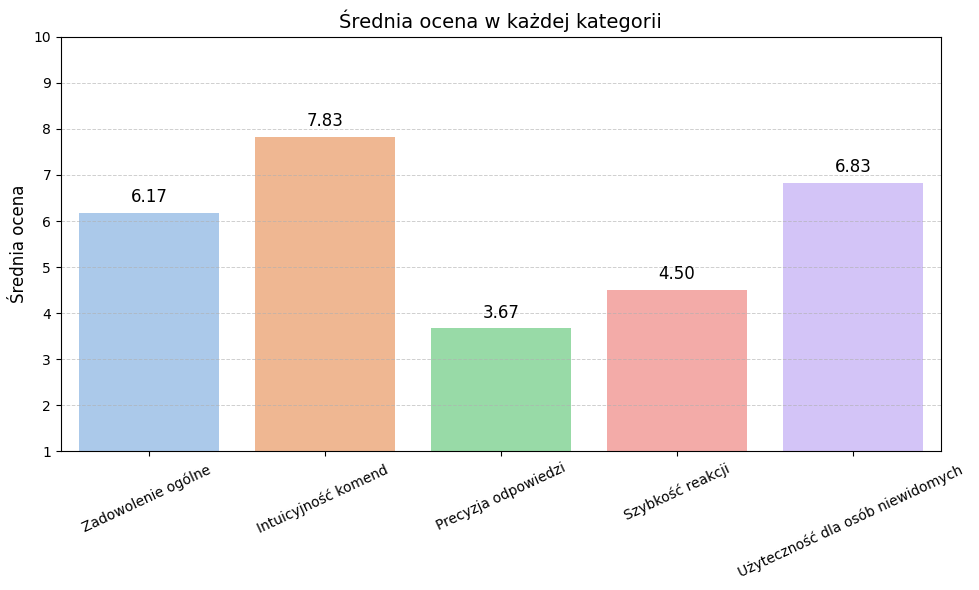

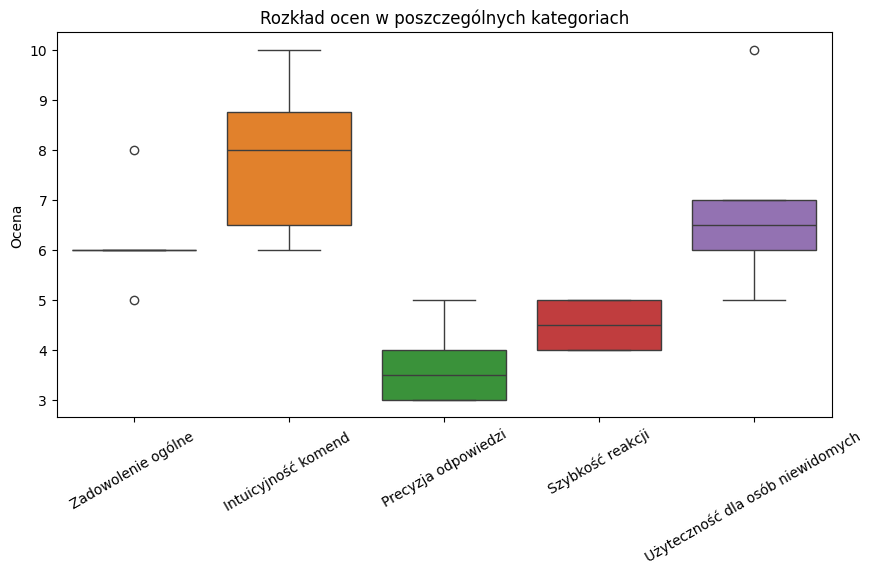

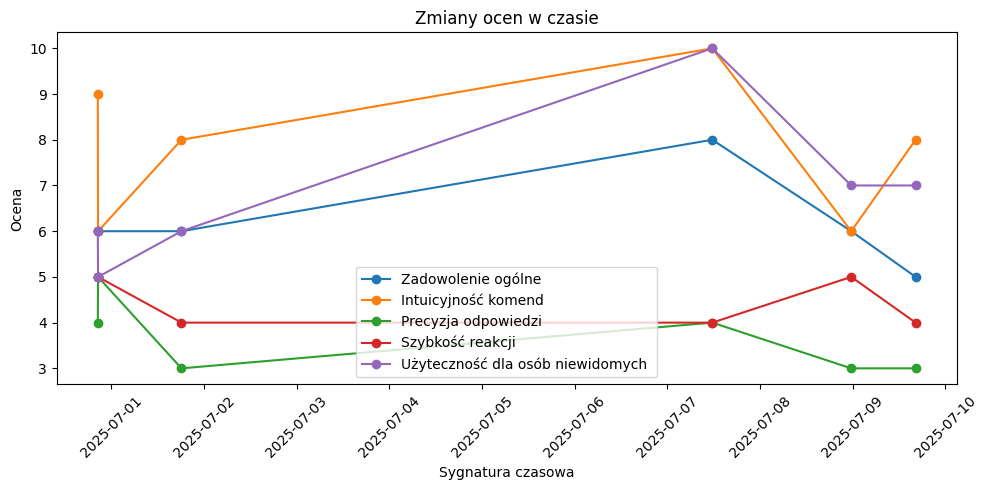

In [16]:

import seaborn as sns

# Usuwamy kolumnę z timestampem i uwagami do analizy liczbowej
oceny = df.drop(columns=['Sygnatura czasowa', 'Inne uwagi'])

# 1. Średnia ocena dla każdej kategorii
plt.figure(figsize=(10, 6))
mean_values = oceny.mean()
bars = sns.barplot(x=mean_values.index, y=mean_values.values, palette="pastel")
plt.title('Średnia ocena w każdej kategorii', fontsize=14)
plt.ylabel('Średnia ocena', fontsize=12)
plt.xlabel('')
plt.xticks(rotation=25, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(1, 10)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

# Dodanie wartości na słupkach
for p in bars.patches:
    bars.annotate(f'{p.get_height():.2f}', 
                  (p.get_x() + p.get_width() / 2, p.get_height()), 
                  ha='center', va='bottom', fontsize=12, color='black',
                  xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

# 2. Rozkład ocen (boxplot)
plt.figure(figsize=(10, 5))
sns.boxplot(data=oceny)
plt.title('Rozkład ocen w poszczególnych kategoriach')
plt.ylabel('Ocena')
plt.xticks(rotation=30)
plt.show()

# 3. Zmiany ocen w czasie (opcjonalnie)
plt.figure(figsize=(10, 5))
for col in oceny.columns:
    plt.plot(df['Sygnatura czasowa'], df[col], marker='o', label=col)
plt.title('Zmiany ocen w czasie')
plt.xlabel('Sygnatura czasowa')
plt.ylabel('Ocena')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


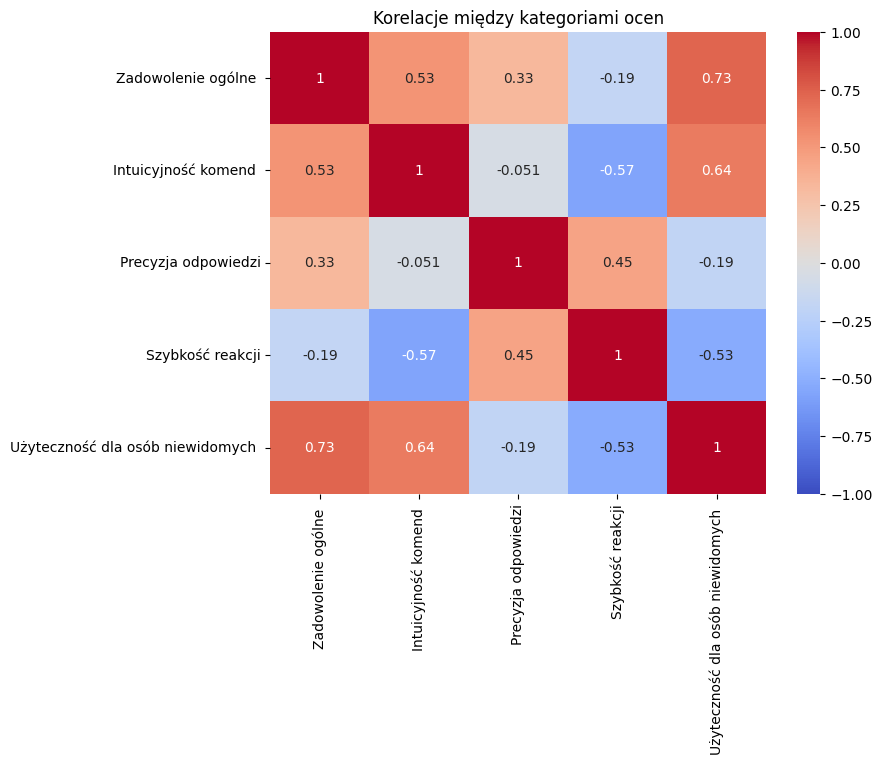

In [5]:
# ...existing code...

plt.figure(figsize=(8, 6))
sns.heatmap(oceny.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelacje między kategoriami ocen')
plt.show()
# ...existing code...

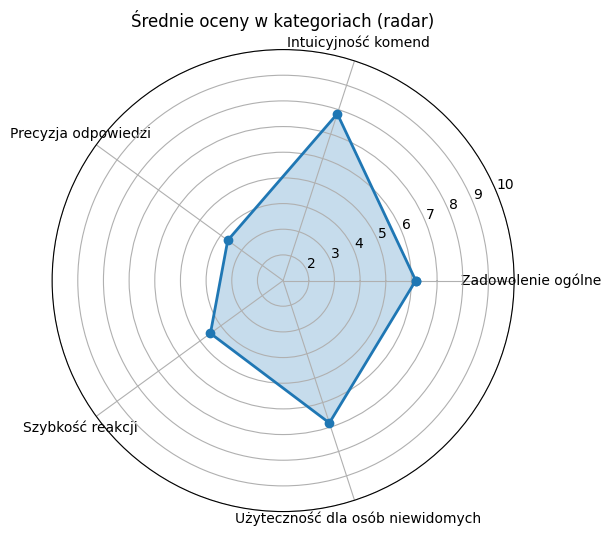

In [12]:


import numpy as np

labels = oceny.columns
means = oceny.mean().values
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
means = np.concatenate((means, [means[0]]))
angles += angles[:1]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, means, 'o-', linewidth=2)
ax.fill(angles, means, alpha=0.25)
ax.set_ylim(1, 10)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title('Średnie oceny w kategoriach (radar)')
plt.show()
